# Import libraries and load data

In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np



# Data Loading and Preprocessing 

In [30]:
# Load CSV file (replace 'path_to_your_file.csv' with the actual file path)
csv_file_path = '/home/souvik/Documents/Code/Python/Machine-Learning-Lab/Dimention Reduction/Wholesale customers data.csv'  # e.g., 'C:/Users/YourName/Wholesale customers data.csv'
df = pd.read_csv(csv_file_path)

# Print column names
print("Available columns in the CSV:", df.columns.tolist())

# Extract numerical features and target
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
target_column = 'Channel'  # Using 'Channel' as target for evaluation
X = df[numerical_columns].copy()
y = df[target_column].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (for consistency, though clustering uses all data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create DataFrame for visualization
df_vis = pd.DataFrame(X_scaled, columns=numerical_columns)
df_vis['Class'] = y

print(df.head())

Available columns in the CSV: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [29]:
print(y_test.head())

265    1
78     1
347    2
255    1
327    1
Name: Channel, dtype: int64


# Data visualization

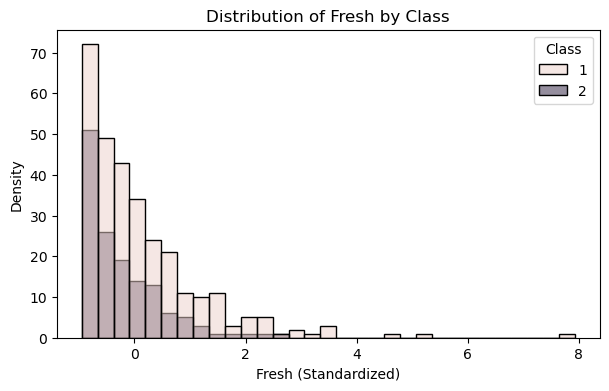

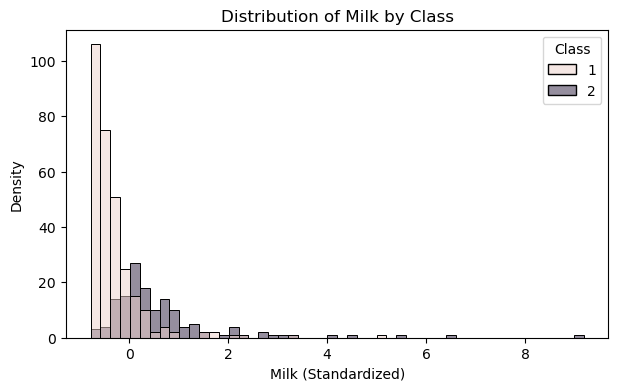

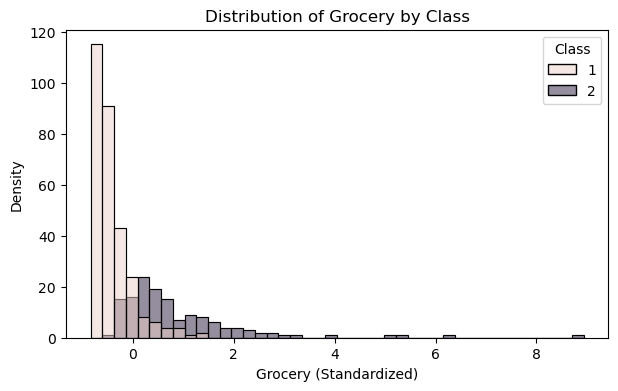

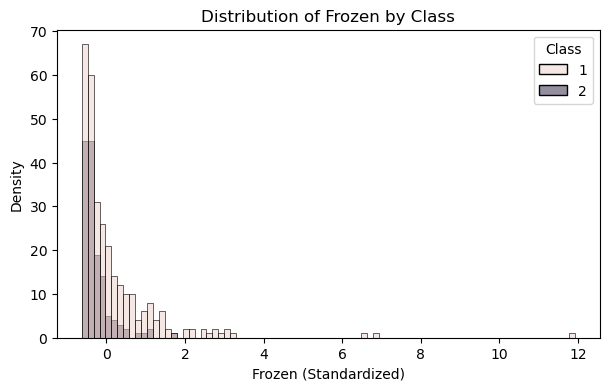

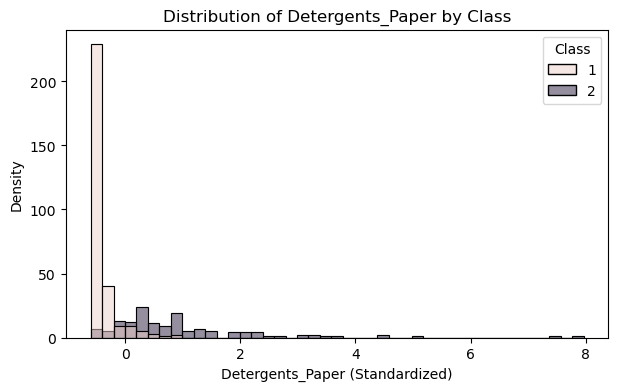

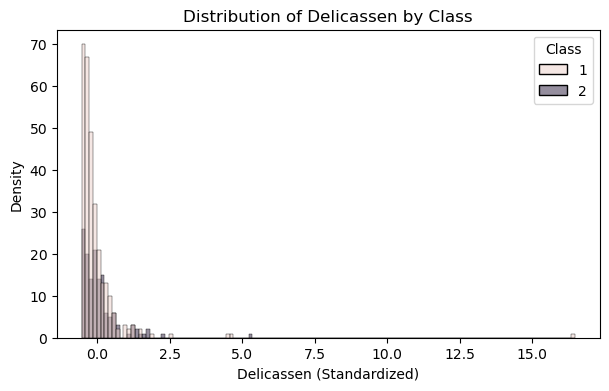

In [24]:
for col in numerical_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df_vis, x=col, hue='Class')
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel(f'{col} (Standardized)')
    plt.ylabel('Density')
    plt.show()

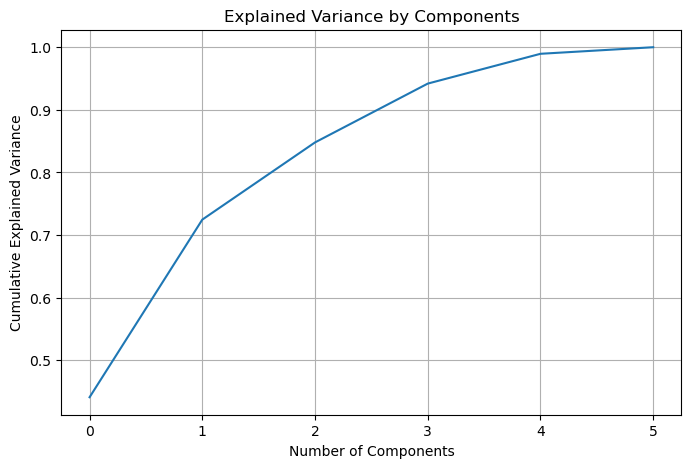

In [25]:
# Plot cumulative explained variance for all PCA components
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.grid(True)
plt.show()

# PCA

Explained Variance Ratio: [0.44082893 0.283764  ]
Total Explained Variance: 0.7245929240774497


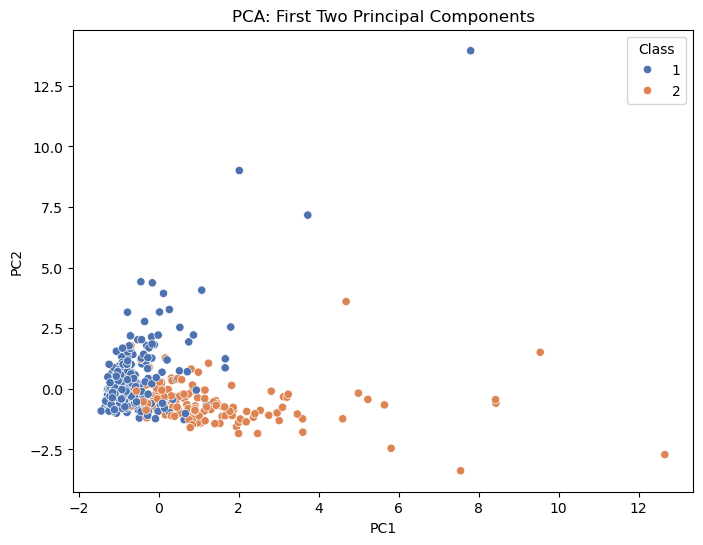

In [26]:
# Cell 4: PCA
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

# Create DataFrame for PCA visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = y

# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='deep')
plt.title('PCA: First Two Principal Components')
plt.show()